Tingkat Kelayakan Kredit: Tidak Layak (0.00)


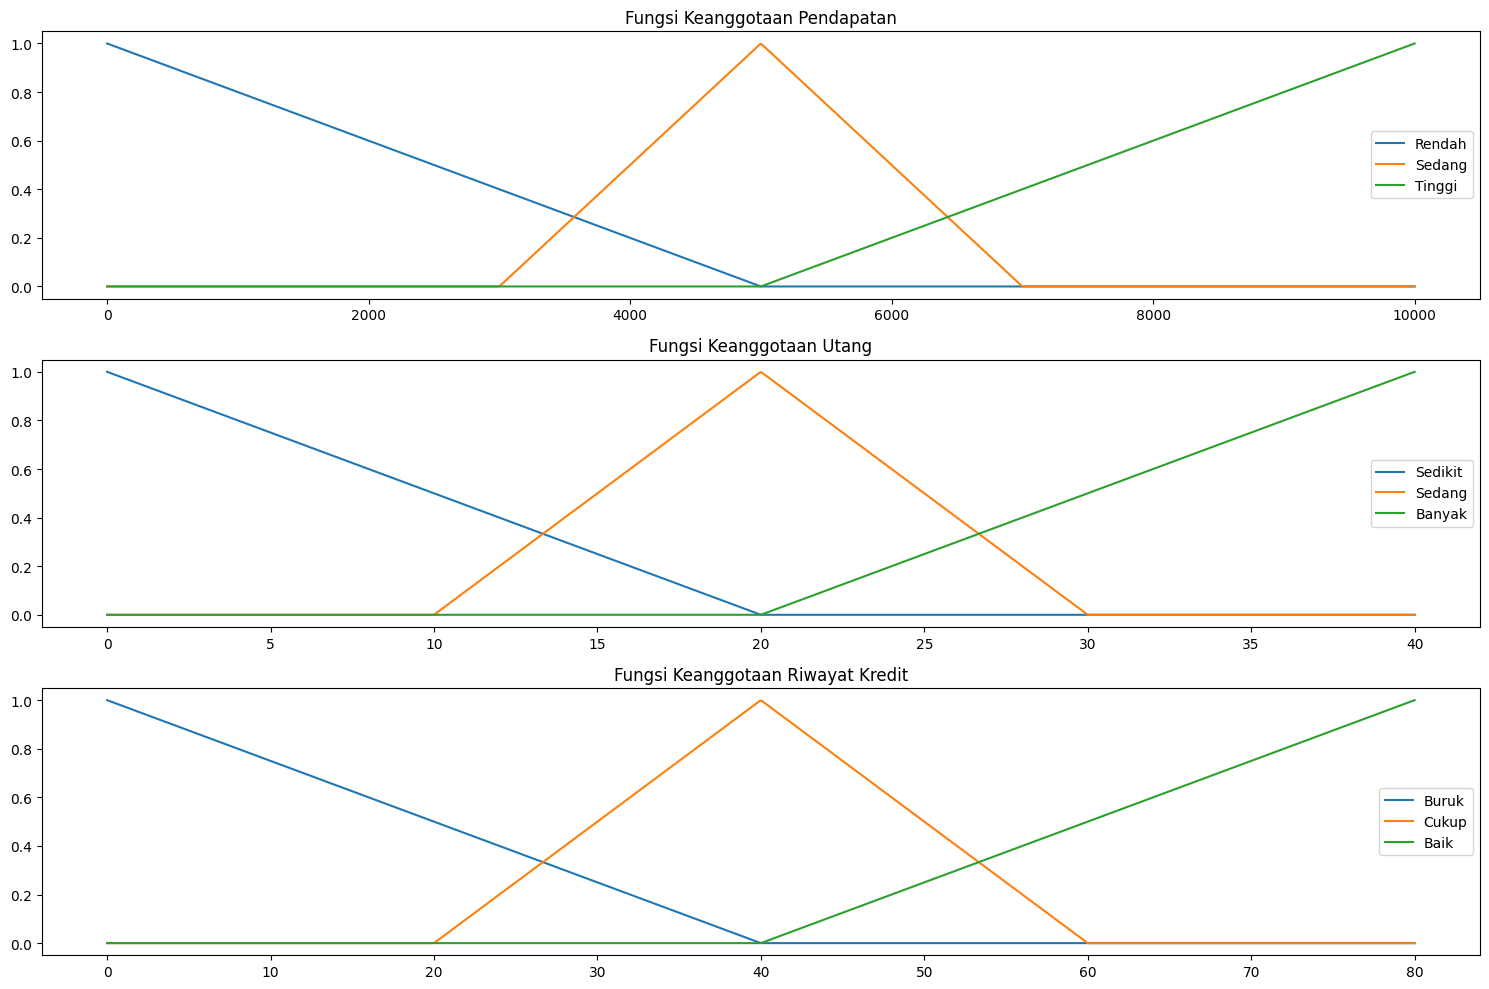

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Membership functions
def pendapatan_rendah(x):
    return max(0, min(1, (5000 - x) / 5000))

def pendapatan_sedang(x):
    return max(0, min((x - 3000) / 2000, (7000 - x) / 2000))

def pendapatan_tinggi(x):
    return max(0, min(1, (x - 5000) / 5000))

def utang_sedikit(x):
    return max(0, min(1, (20 - x) / 20))

def utang_sedang(x):
    return max(0, min((x - 10) / 10, (30 - x) / 10))

def utang_banyak(x):
    return max(0, min(1, (x - 20) / 20))

def riwayat_buruk(x):
    return max(0, min(1, (40 - x) / 40))

def riwayat_cukup(x):
    return max(0, min((x - 20) / 20, (60 - x) / 20))

def riwayat_baik(x):
    return max(0, min(1, (x - 40) / 40))

# Fuzzy Inference System
def fuzzy_kelayakan_kredit(pendapatan, utang, riwayat):
    rules = [
        (min(pendapatan_rendah(pendapatan), utang_banyak(utang), riwayat_buruk(riwayat)), 'tidak_layak'),
        (min(pendapatan_sedang(pendapatan), utang_sedang(utang), riwayat_cukup(riwayat)), 'tidak_layak'),
        (min(pendapatan_tinggi(pendapatan), utang_sedikit(utang), riwayat_baik(riwayat)), 'layak'),
    ]

    kelayakan_values = {'tidak_layak': 0, 'layak': 1}

    numerator = 0
    denominator = 0
    for rule in rules:
        fuzzy_value, kelayakan = rule[0], kelayakan_values[rule[1]]
        numerator += fuzzy_value * kelayakan
        denominator += fuzzy_value

    hasil = numerator / denominator if denominator != 0 else 0
    return hasil

# Example input
pendapatan = 4000
utang = 15
riwayat = 50
kelayakan = fuzzy_kelayakan_kredit(pendapatan, utang, riwayat)
print(f"Tingkat Kelayakan Kredit: {'Layak' if kelayakan >= 0.5 else 'Tidak Layak'} ({kelayakan:.2f})")

# Visualisasi (Optional)
def plot_membership():
    x_pendapatan = np.linspace(0, 10000, 1000)
    x_utang = np.linspace(0, 40, 1000)
    x_riwayat = np.linspace(0, 80, 1000)

    plt.figure(figsize=(15, 10))

    # Pendapatan
    plt.subplot(3, 1, 1)
    plt.plot(x_pendapatan, [pendapatan_rendah(x) for x in x_pendapatan], label='Rendah')
    plt.plot(x_pendapatan, [pendapatan_sedang(x) for x in x_pendapatan], label='Sedang')
    plt.plot(x_pendapatan, [pendapatan_tinggi(x) for x in x_pendapatan], label='Tinggi')
    plt.title('Fungsi Keanggotaan Pendapatan')
    plt.legend()

    # Utang
    plt.subplot(3, 1, 2)
    plt.plot(x_utang, [utang_sedikit(x) for x in x_utang], label='Sedikit')
    plt.plot(x_utang, [utang_sedang(x) for x in x_utang], label='Sedang')
    plt.plot(x_utang, [utang_banyak(x) for x in x_utang], label='Banyak')
    plt.title('Fungsi Keanggotaan Utang')
    plt.legend()

    # Riwayat Kredit
    plt.subplot(3, 1, 3)
    plt.plot(x_riwayat, [riwayat_buruk(x) for x in x_riwayat], label='Buruk')
    plt.plot(x_riwayat, [riwayat_cukup(x) for x in x_riwayat], label='Cukup')
    plt.plot(x_riwayat, [riwayat_baik(x) for x in x_riwayat], label='Baik')
    plt.title('Fungsi Keanggotaan Riwayat Kredit')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_membership()